By Yufei GE

In this notebook, we are going to take a look at the stack overflow survey 2019 and I will focus mainly on french developers data. 
I will try to answer 3 main questions in the notebook:
  1. What technologies do they use and how are the technologies are asscociated with the salaries.
  2. What are the developer types and the breakdown salaries that come with.
  3. An investigation on the education background of french developers. 

In [72]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import textwrap as tw

In [73]:
data = pd.read_csv('survey_results_public.csv')

In [74]:
# Take a look at all 85 columns of the dataframe
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(data)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [75]:
#Select only France data
Francedata= data.query("Country=='France'")
Francedata.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,2391.000000,1659.000000,1657.000000,1784.00000,1279.000000,2244.000000
mean,44069.826432,35787.723327,81214.779722,40.85032,4.233237,29.866934
std,25860.583290,34319.677584,135682.648126,23.78694,3.741696,8.619978
min,57.000000,0.000000,0.000000,4.00000,0.000000,1.000000
25%,21667.500000,3500.000000,36664.000000,36.00000,2.000000,24.000000
50%,43893.000000,37000.000000,46752.000000,40.00000,3.000000,28.000000
75%,66774.500000,50000.000000,64162.000000,40.00000,5.000000,34.000000
max,88849.000000,440000.000000,1000000.000000,385.00000,60.000000,88.000000


In [76]:
#I will mainly focus on the professional developers
data.MainBranch.unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

In [77]:
Fdf = pd.DataFrame(Francedata.query("MainBranch == 'I am a developer by profession'"))
Fdf.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
194,196,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,France,"Yes, part-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,40.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
196,198,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",France,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,30.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
256,258,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,France,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Easy
305,307,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, but looking for work",France,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
328,330,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,France,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,35.0,Man,No,Straight / Heterosexual,"Native American, Pacific Islander, or Indigeno...",No,Appropriate in length,Easy


In [78]:
#Exclure 0 values,Here I choose values in USD as I am going to write on a US based media
Fdf = Fdf[Fdf['ConvertedComp'] != 0]

print(Fdf.ConvertedComp.isnull().sum())


264


In [79]:
Fdf.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,1756.000000,1494.000000,1492.00000,1594.000000,1200.000000,1665.000000
mean,44201.677107,36077.234270,81402.47118,40.766292,4.269842,30.493093
std,25990.721237,33807.536562,136001.32295,24.954121,3.794826,7.577253
min,196.000000,33.000000,38.00000,4.000000,0.000000,1.000000
25%,21491.250000,4200.000000,36670.00000,36.000000,2.000000,25.000000
50%,43907.000000,37600.000000,46752.00000,39.000000,4.000000,29.000000
75%,67429.500000,50000.000000,63470.50000,40.000000,5.000000,34.000000
max,88847.000000,440000.000000,1000000.00000,385.000000,60.000000,71.000000


# Part I Check the technologies and developer types

___

As the codes for the findings are similar, I will work with them one after another

In [80]:
Fdf.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript;SQL;TypeScript',
       'HTML/CSS;Java;JavaScript;Python;SQL',
       'C;HTML/CSS;Java;JavaScript;PHP;Python', ...,
       'Clojure;HTML/CSS;JavaScript;PHP;SQL',
       'Bash/Shell/PowerShell;C#;Go;HTML/CSS;JavaScript;PHP;VBA',
       'Bash/Shell/PowerShell;C;C++;C#;Dart;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;PHP;SQL;Swift;VBA'],
      dtype=object)

We can see above that we need to clean this column so as to extract intersting foundings. I am going to count each of the language and find the percentage with regard to the number of respondents.

In [81]:
# Prepare the cleaning of the dataframe
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe we want to search
    col1 - the column name we want to look through
    col2 - the column we want to count values from
    look_for - a list of strings we want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of language type
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the language type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [82]:
#Check the number of respondants to see if the number is significant, this figure is used in next cell
respondant = Fdf['LanguageWorkedWith'].count()
respondant

1748

1748


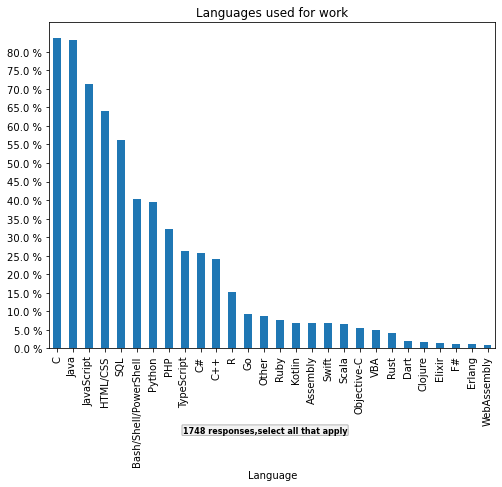

In [83]:
possible_vals = ["Assembly", "Bash/Shell/PowerShell", 
                 "C", "C++","C#", 
                 "Clojure", "Dart", "Elixir",
                 "Erlang", "F#", "Go",
                 "HTML/CSS", "Java",
                 "JavaScript", "Kotlin", "Objective-C","PHP", "Python", "R",
                 "Ruby", "Rust", "Scala",
                 "SQL", "Swift",
                 "TypeScript", "VBA", "WebAssembly","Other"]

def clean_and_plot(Fdf, title='Languages used for work', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LanguageWorkedWith column
        title - string the title of ourr plot
        axis - axis object
        plot - bool providing whether or not we want a plot back
        
    OUTPUT
        language_df - a dataframe with the count of how many languages
        Displays a plot of pretty things related to the LanguageWorkedWith column.
    '''
    language = Fdf['LanguageWorkedWith'].value_counts().reset_index()
    respondant = Fdf['LanguageWorkedWith'].count()
    language.rename(columns={'index': 'Language', 'LanguageWorkedWith': 'count'}, inplace=True)
    language_df = total_count(language, 'Language', 'count', possible_vals)

    language_df.set_index('Language', inplace=True)
    if plot:
        (language_df/respondant).plot(kind='bar', legend=None,figsize=[8,6]);
        y_ticks = np.round(np.arange(0,0.85,0.05),2);
        y_ticklabels = pd.Series(y_ticks * 100).round(2).astype(str) + " %";
        plt.yticks(y_ticks,y_ticklabels);
        plt.title(title);
#Add footnote
        comment2_txt = '''1748 responses,select all that apply  
    ''';
        fig_txt = tw.fill(tw.dedent(comment2_txt.rstrip() ), width=60);

# The YAxis value is -0.07 to push the text down slightly
        plt.figtext(0.5, -0.07, fig_txt, horizontalalignment='center',
            fontsize=8, multialignment='left',
            bbox=dict(boxstyle="round", facecolor='#D8D8D8',
                      ec="0.1", pad=0.1, alpha=0.3), fontweight='bold');
    #Save images for my data visualization article
        plt.savefig('Languages_used_for_work.png',bbox_inches='tight')
    props_language_df = language_df/respondant
    print(respondant)
    
    
    return props_language_df
    
props_df = clean_and_plot(Fdf)



In [84]:
# Get the list of the developer type, which I will use next
df_devtype=data.DevType.unique()

df_devtype=df_devtype.tolist()
strings=[]
for i in df:
    for f in str(i).split(";"):
        strings.append(f)
strings=set(strings)
strings

{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'Student',
 'System administrator',
 'nan'}

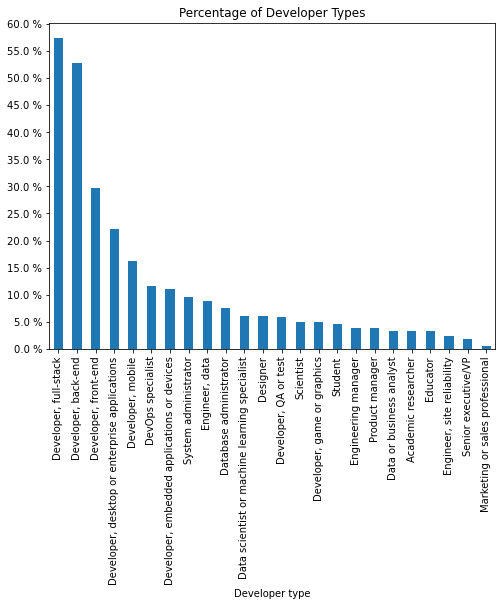

In [85]:

possible_vals = ['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'Scientist',
 'Senior executive/VP',
 'Student',
 'System administrator',
 'nan']

def clean_and_plot(Fdf, title='Percentage of Developer Types', plot=True):
    '''
    INPUT 
        df - a dataframe holding the DevType column
        title - string the title of ourr plot
        axis - axis object
        plot - bool providing whether or not we want a plot back
        
    OUTPUT
        Devtype_df - a dataframe with the count of how many Developer types
        Displays a plot of pretty things related to the DevType column.
    '''
    Devtype = Fdf['DevType'].value_counts().reset_index()
    Devtype.rename(columns={'index': 'Developer type', 'DevType': 'count'}, inplace=True)
    Devtype_df = total_count(Devtype, 'Developer type', 'count', possible_vals)
    respondant = Fdf['DevType'].count()

    Devtype_df.set_index('Developer type', inplace=True)
    if plot:
        (Devtype_df/respondant).plot(kind='bar', legend=None,figsize=[8,6]);
        plt.title(title);
        y_ticks = np.round(np.arange(0,0.65,0.05),2);
        y_ticklabels = pd.Series(y_ticks * 100).round(2).astype(str) + " %"
        plt.yticks(y_ticks,y_ticklabels);
        #Save images for my data visualization article
        plt.savefig('Percentage of Developer Types.png',bbox_inches='tight')
    props_Devtype_df = Devtype_df/respondant
    return props_Devtype_df
    
props_df = clean_and_plot(Fdf)

In [86]:
# Check company size to see if there is anything interesting
Orgsize = Fdf.groupby('OrgSize').median()['ConvertedComp']
Orgsize

OrgSize
1,000 to 4,999 employees                              45830.0
10 to 19 employees                                    41247.0
10,000 or more employees                              48121.0
100 to 499 employees                                  49267.0
2-9 employees                                         41244.0
20 to 99 employees                                    46654.0
5,000 to 9,999 employees                              50413.0
500 to 999 employees                                  50700.0
Just me - I am a freelancer, sole proprietor, etc.    68745.0
Name: ConvertedComp, dtype: float64

# Part 2 Check the salaries associated with the technologies and developer types

_____

In [87]:
DevType = []
for dev in Fdf.DevType:
    try:
        DevType.extend(dev.split(';'))
    except AttributeError:
        pass

# we end up needing this later
DevType = set(DevType)
print("The number of DevType is {}.".format(len(DevType)))

The number of DevType is 24.


In [88]:
def split_DevType(val):
    try:
        if val.find(dev) >-1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

# Apply function for each developer type
for dev in DevType:        
    Fdf[dev] = Fdf['DevType'].apply(split_DevType)

In [89]:
#check if data related with this row is representative, for me, it is ok
Fdf[Fdf['Senior executive/VP']==1]['ConvertedComp'].tolist()

[68745.0,
 nan,
 nan,
 nan,
 64620.0,
 nan,
 nan,
 69.0,
 57287.0,
 nan,
 88223.0,
 nan,
 54996.0,
 68748.0,
 76765.0,
 68745.0,
 32076.0,
 nan,
 68748.0,
 80202.0,
 28644.0,
 nan,
 91660.0,
 19884.0,
 71609.0,
 nan,
 63016.0,
 42393.0,
 45830.0,
 126032.0,
 75619.0,
 114575.0,
 72182.0]

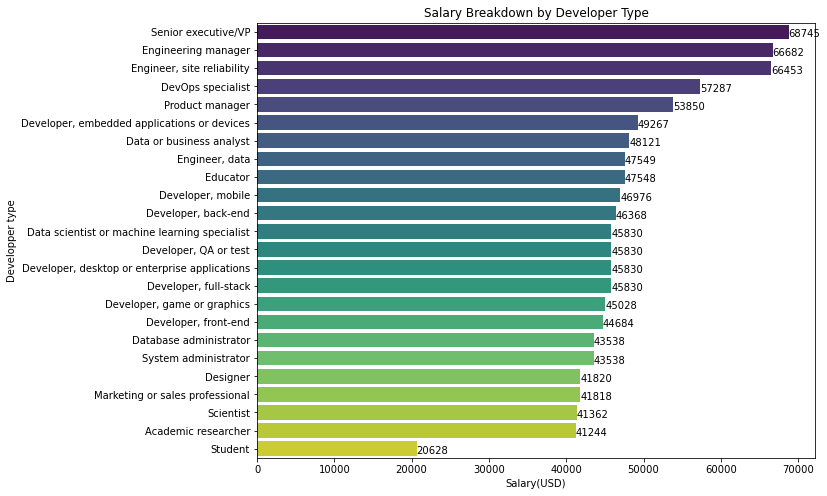

In [98]:
#Make a barplot with 2 variables, developer types and the salaries
Salary = dict()
for dev in DevType:
    Sal_median = Fdf[Fdf[dev]==1].ConvertedComp.median()
    Salary[dev]=Sal_median
Salary = pd.DataFrame(Salary.items(),columns=['Developper type','Salary(USD)'])
Salary = Salary.sort_values(by='Salary(USD)',ascending=False).reset_index(drop=True)
plt.figure(figsize=[10,8])
plt.title("Salary Breakdown by Developer Type")
ax = sns.barplot(y="Developper type", x='Salary(USD)', data=Salary,palette='viridis')
#Add salary amount annotation for each catagorical type
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.65*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center')
    
plt.savefig('Slary Breakdown by Developer Type',bbox_inches='tight')

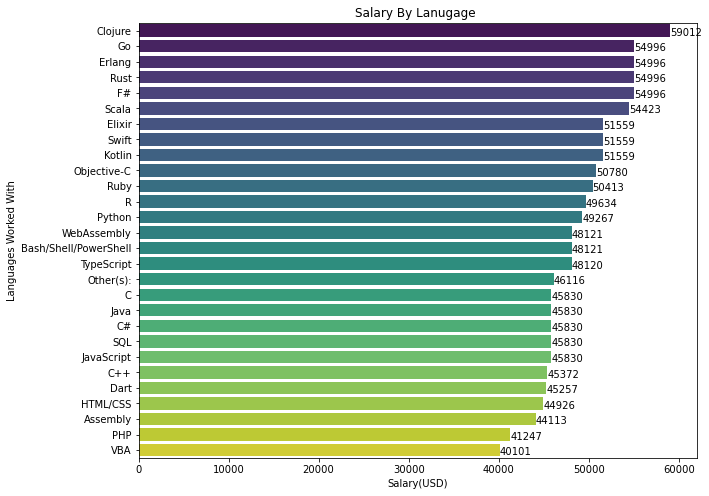

In [91]:
LanguageWorkedWith = []
for language in Fdf.LanguageWorkedWith:
    try:
        LanguageWorkedWith.extend(language.split(';'))
    except AttributeError:
        pass

# we end up needing this later
LanguageWorkedWith = set(LanguageWorkedWith)

def split_LanguageWorkedWith(val):
    try:
        if val.find(language) >-1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

# Apply function for each language
for language in LanguageWorkedWith:        
    Fdf[language] = Fdf['LanguageWorkedWith'].apply(split_LanguageWorkedWith)
    
Salary_language = dict()
for language in LanguageWorkedWith:
    Salary_language_median = Fdf[Fdf[language]==1].ConvertedComp.median()
    Salary_language[language]=Salary_language_median
Salary_language = pd.DataFrame(Salary_language.items(),columns=['LanguageWorkedWith','Salary(USD)'])
Salary_language = Salary_language.sort_values(by='Salary(USD)',ascending=False).reset_index(drop=True)
plt.figure(figsize=[10,8])
ax = sns.barplot(y="LanguageWorkedWith", x='Salary(USD)', data=Salary_language,palette='viridis')
plt.ylabel("Languages Worked With")
plt.title("Salary By Lanugage ")
# Add annotations to each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.65*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center')
plt.savefig('Salary by Language',bbox_inches='tight')

# Part 3 Interesting Studies about french developers' education background

----

Use 2 catagorical variables,the undergraduate major and education level,  I choose heatmap as the data viz tool

In [92]:
Edlevel = pd.DataFrame(Fdf.groupby(['UndergradMajor','EdLevel',]).Respondent.count().sort_values(ascending=False))
Edlevel.reset_index()

,UndergradMajor,EdLevel,Respondent
0,"Computer science, computer engineering, or sof...","Master’s degree (MA, MS, M.Eng., MBA, etc.)",888
1,"Computer science, computer engineering, or sof...","Bachelor’s degree (BA, BS, B.Eng., etc.)",147
2,"Another engineering discipline (ex. civil, ele...","Master’s degree (MA, MS, M.Eng., MBA, etc.)",86
3,"Information systems, information technology, o...","Master’s degree (MA, MS, M.Eng., MBA, etc.)",52
4,"Computer science, computer engineering, or sof...","Other doctoral degree (Ph.D, Ed.D., etc.)",48
5,Web development or web design,"Bachelor’s degree (BA, BS, B.Eng., etc.)",47
6,Web development or web design,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",43
7,Mathematics or statistics,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",34
8,"Computer science, computer engineering, or sof...","Professional degree (JD, MD, etc.)",30
9,"Computer science, computer engineering, or sof...",Some college/university study without earning ...,28


In [93]:
Edlevel.Respondent.sum()

1648

In [99]:
#Prepare the table for heatmap
cat_count = Edlevel.pivot_table(index="UndergradMajor",columns="EdLevel",values="Respondent")
cat_count

EdLevel,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)","Professional degree (JD, MD, etc.)",Some college/university study without earning a degree
UndergradMajor,,,,,,
"A business discipline (ex. accounting, finance, marketing)",NaN,7.0,11.0,NaN,NaN,3.0
"A health science (ex. nursing, pharmacy, radiology)",NaN,NaN,1.0,NaN,1.0,NaN
"A humanities discipline (ex. literature, history, philosophy)",NaN,9.0,5.0,NaN,2.0,2.0
"A natural science (ex. biology, chemistry, physics)",NaN,4.0,24.0,14.0,3.0,NaN
"A social science (ex. anthropology, psychology, political science)",NaN,7.0,8.0,1.0,NaN,3.0
"Another engineering discipline (ex. civil, electrical, mechanical)",NaN,10.0,86.0,5.0,1.0,5.0
"Computer science, computer engineering, or software engineering",20.0,147.0,888.0,48.0,30.0,28.0
"Fine arts or performing arts (ex. graphic design, music, studio art)",2.0,2.0,8.0,NaN,NaN,6.0
I never declared a major,1.0,3.0,1.0,NaN,NaN,3.0


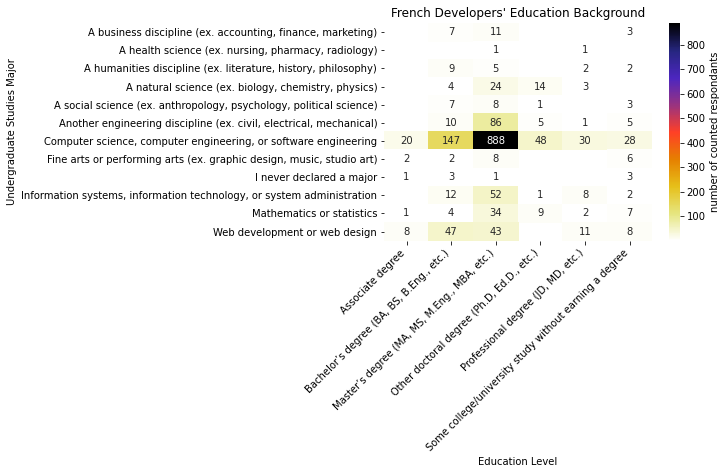

In [100]:
sns.heatmap(cat_count, annot = True, fmt = '.0f',
           cbar_kws = {'label' : 'number of counted respondants'},cmap="CMRmap_r")
plt.xticks(rotation=45,ha='right')
plt.xlabel("Education Level")
plt.ylabel("Undergraduate Studies Major")
plt.title("French Developers' Education Background")
plt.savefig('French Developers Education Background',bbox_inches='tight')

The findings here are interesting, that most developers are trained at school and receive higher education: a majority of them have a master's degree